## Урок 7.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [157]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [159]:
data = np.array([zp, ks]).T
data = data[np.argsort(data[:, 0])].T
data

array([[ 35,  40,  45,  54,  70, 110, 120, 150, 190, 200],
       [401, 459, 574, 653, 739, 832, 746, 902, 874, 919]])

In [160]:
b = (np.mean(data[0]*data[1])-np.mean(data[0])*np.mean(data[1]))/(np.mean((data[0])**2)-(np.mean(data[0]))**2)
b

2.620538882402765

In [161]:
a = np.mean(data[1])-b*np.mean(data[0])
a

444.1773573243596

<function matplotlib.pyplot.show(*args, **kw)>

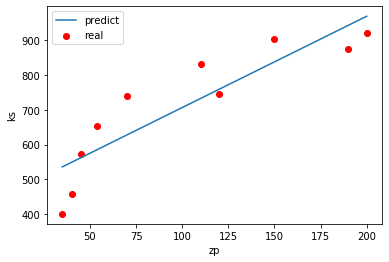

In [162]:
plt.scatter(data[0], data[1], color='red')
plt.plot(data[0], (a + b*data[0]))
plt.ylabel('ks')
plt.xlabel('zp')
plt.legend(['predict', 'real'], loc='upper left')
plt.show

Теперь решаем без интерсепта

In [163]:
data_re = data.T

In [164]:
B = np.dot(np.linalg.inv(np.dot(data_re[0:, 0:1].T,data_re[0:, 0:1])),data_re[0:, 0:1].T @ data_re[0:, 1:2])
B

array([[5.88982042]])

<function matplotlib.pyplot.show(*args, **kw)>

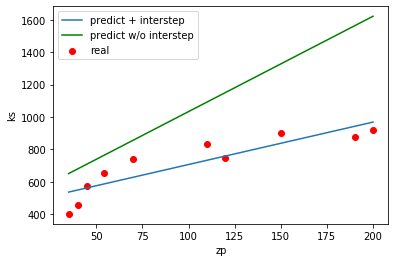

In [167]:
plt.scatter(data[0], data[1], color='red')
plt.plot(data[0], (a + b*data[0]))
plt.plot(data[0], (a + B[0]*data[0]), color='green')
plt.ylabel('ks')
plt.xlabel('zp')
plt.legend(['predict + interstep', 'predict w/o interstep', 'real'], loc='upper left')
plt.show

In [166]:
data_re = np.hstack([np.ones((10,1)), data_re])
data_re

array([[  1.,  35., 401.],
       [  1.,  40., 459.],
       [  1.,  45., 574.],
       [  1.,  54., 653.],
       [  1.,  70., 739.],
       [  1., 110., 832.],
       [  1., 120., 746.],
       [  1., 150., 902.],
       [  1., 190., 874.],
       [  1., 200., 919.]])

In [154]:
B = np.dot(np.linalg.inv(np.dot(data_re[0:, 0:2].T,data_re[0:, 0:2])),data_re[0:, 0:2].T @ data_re[0:, 2:3])
B

array([[444.17735732],
       [  2.62053888]])

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [194]:
def grad_woi(B1=0.1,
         y=data[1],
         X=data[0],
         n=len(zp),
         ite=10000,
         alfa=1e-6,
            dev=2):
    
    for i in range(ite):
        B1-=alfa*(2/n)*np.sum((B1*X-y)*X)
        mse_ = np.sum((B1*X-y)**2)/n
        if i%(ite/dev)==0:
            print('Iteration: {i}, B1={B1}, mse{mse}'.format(i=i, B1=B1, mse=mse_))
    return

In [195]:
grad_woi()

Iteration: 0, B1=0.25952808, mse493237.72125469625
Iteration: 5000, B1=5.889820420132673, mse56516.85841571943


#### *4.
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [192]:
def grad_wi(B1=0.1,
            B0=0.1,
         y=data[1],
         X=data[0],
         n=len(zp),
         ite=10000,
         alfa=1e-6,
            dev=2):
    
    for i in range(ite):
        y_pred=B0+B1*X
        B0-=alfa*(2/n)*np.sum((y_pred-y))
        B1-=alfa*(2/n)*np.sum((y_pred-y)*X)
        mse_ = np.sum((B0+B1*X-y)**2)/n
        if i%(ite/dev)==0:
            print('Iteration: {i}, B0={B0}, B1={B1}, mse{mse}'.format(i=i, B0=B0, B1=B1, mse=mse_))
    return

In [198]:
grad_wi(ite=3600000, dev=10, alfa=5e-6)

Iteration: 0, B0=0.10699660000000001, B1=0.8975390000000001, mse399736.8945969929
Iteration: 360000, B0=266.00436921813855, B1=3.9319708496676706, mse14523.162451014778
Iteration: 720000, B0=372.6836413759461, B1=3.146764240970642, mse7766.98470076277
Iteration: 1080000, B0=415.48977973787964, B1=2.83169213694589, mse6679.174615415442
Iteration: 1440000, B0=432.66617628050017, B1=2.7052662642710614, mse6504.026650763529
Iteration: 1800000, B0=439.55837934948744, B1=2.6545366024652957, mse6475.826131265741
Iteration: 2160000, B0=442.3239456326214, B1=2.634180811894338, mse6471.285574362761
Iteration: 2520000, B0=443.43365711237965, B1=2.6260128447716893, mse6470.554500703249
Iteration: 2880000, B0=443.8789400823739, B1=2.6227353652416214, mse6470.436790759948
Iteration: 3240000, B0=444.0576143837435, B1=2.621420243387095, mse6470.417838318464


В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

если известна дисперсия или среднеквадратическое отклонение, то мы считаем по Лапласу, если нет - по Стьюденту